In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인
mpl.rcParams['axes.unicode_minus'] = False

['Malgun Gothic'] 10.0


- 테스트

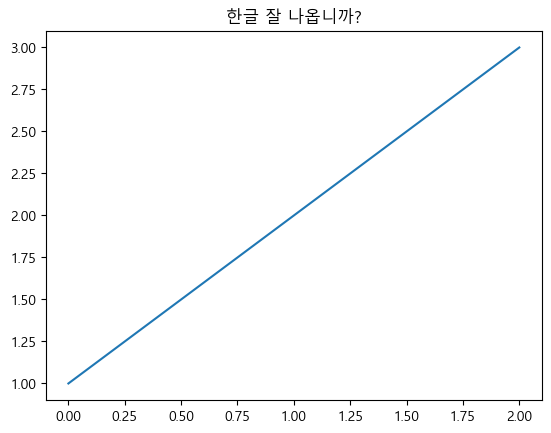

In [4]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

## 주요 라이브러리 불러오기

In [3]:
# 라이브러리 불러오기

'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 및 모델 평가 관련 라이브러리'''
from scipy.stats import pearsonr
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

## 데이터 불러오기

In [10]:
# 데이터 탐색
data = pd.read_csv("credit_card.txt")
data.shape


(284807, 31)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- 인스턴스 284.807건
- 사기 거래 총 492건
- 거래 시간 범위 : 0 ~ 172,792
- 거래 금액 : 0 ~ 25,691.16
- 레이블 표시
  + 사기 거래 : 1 표시
  + 정상 거래 : 0 표시

In [11]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [12]:
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

## 데이터 가공

In [14]:
# 피쳐 행렬 및 레이블 배열 생성하기
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

- 피처 스케일링
- 거래 시간 피처를 제외한 나머지 피처의 평균이 0이고 표준 편차가 1이 되도록 피처 행렬 변환

In [15]:
# 피쳐 스케일링
featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

In [16]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


## 피처 엔지니어링 및 피처 선택하기
- 원본 피처 미 존재

### 피처 간 상관관계 확인
- 이미 차원 축소 했기 때문에, 불필요하게 중복되는 피처는 미 존재

In [17]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [18]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.23
V2,-0.01,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.53
V3,-0.42,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.21
V4,-0.11,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.1
V5,0.17,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.39
V6,-0.06,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.22
V7,0.08,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.4
V8,-0.04,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.1
V9,-0.01,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.04


c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


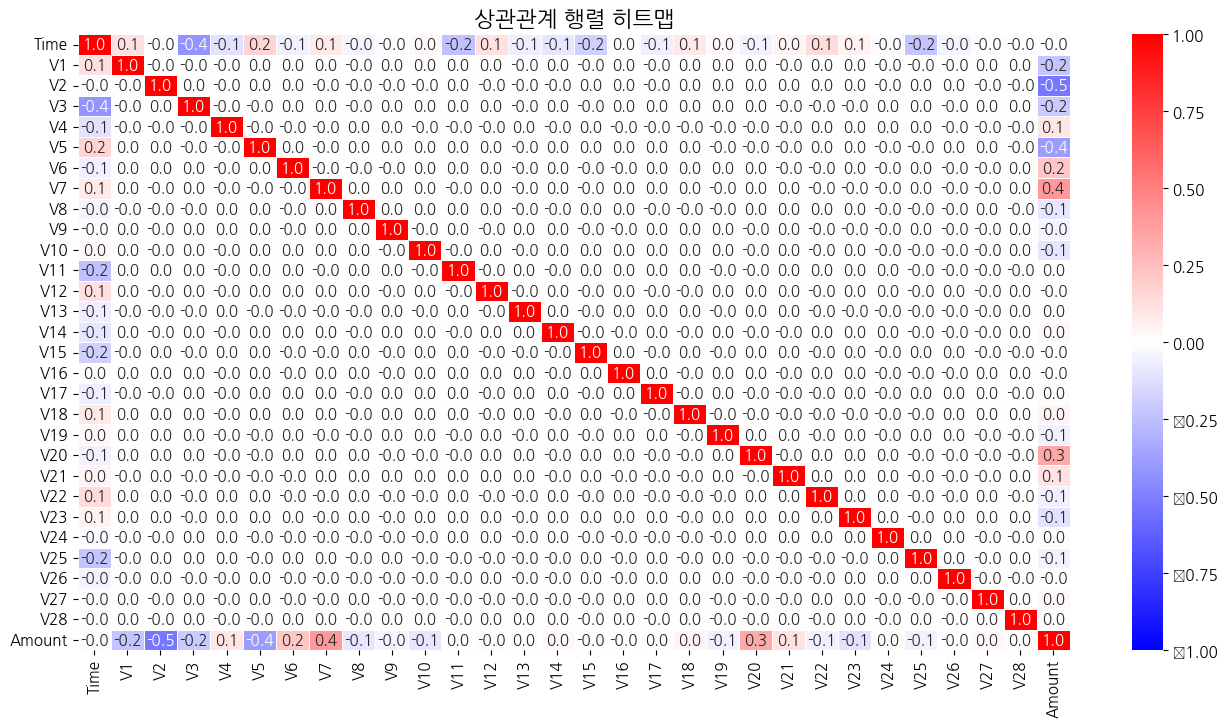

In [22]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'])

# matplotlib 그림 설정
plt.figure(figsize=(16, 8))

# 컬러바가 있는 히트맵 그리기
sns.heatmap(correlationMatrix.astype(float), annot=True, fmt='.1f', cmap = cmap, vmin=-1, vmax=1, linewidths=0.5)

# 제목과 라벨 추가
plt.title('상관관계 행렬 히트맵', size=16)
plt.show()

# 레이블 데이터 시각화
- 전체 데이터셋에 대한 레이블 확인

C:\Users\campus3S043\AppData\Local\Temp\ipykernel_13592\3523796544.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'],sort=True).sort_index()


Text(0, 0.5, 'Frequency Percentage')

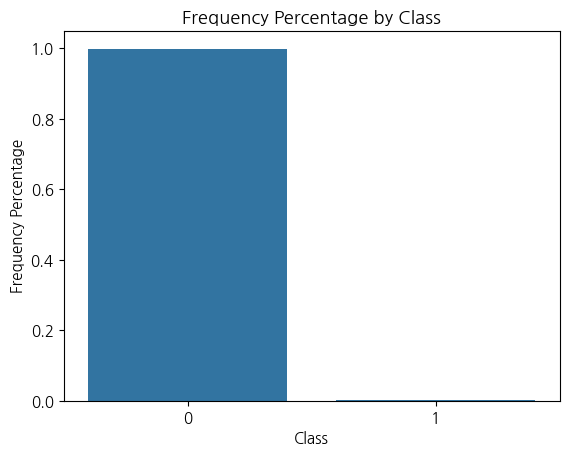

In [23]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

# 모델 만들기 전 사전 작업

## 훈련 및 테스트 데이터셋으로 분할

In [24]:
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)

In [25]:
len(X_train), len(X_test), y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(190820, 93987, 0.0017293784718582959, 0.0017236426314277506)

## 이상치 스코어 점수 정의
- 차원 축소 : 재구성 오차 최소화
- 가장 비정상적인 거래에서 가장 큰 재구성 오차가 발생함
- 이를 기반으로 재구성 오차 정의
  + 각 거래의 재구성 오차는 원본 피처 행렬과 차원 축소 알고리즘 사용해 재구성
  + 전체 데이터셋에 대한 차이 제곱 합의 최대-최소 범위를 구해서 차이 제곱 합의 범위 정규화
  + 모든 재구성 오차가 0에서 1사이의 범위에 놓임
  + 차이 제곱합이 가장 큰 거래는 1에 가까운 오차 vs 차이 제곱합이 가장 작은 거래는 0에 가까운 오차
  + 0은 정상, 1은 비정상

In [26]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

## 평가 지표
- 정밀도-재현율 곡선, 평균 정밀도, 수신자 조작 특성 아래의 면적 사용

In [27]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

## 시각화 함수 정의

In [28]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

# 비지도학습 모델 만들기

## 일반 PCA 활용한 이상치 탐지
- 이상치 탐지는 재구성 오차에 의존
- PCA에서 재구성 오차는 주성분 개수에 크게 좌우
- Steps
  + 원본 차원의 수와 동일한 PCA 주성분 수 찾기 (30개)

c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


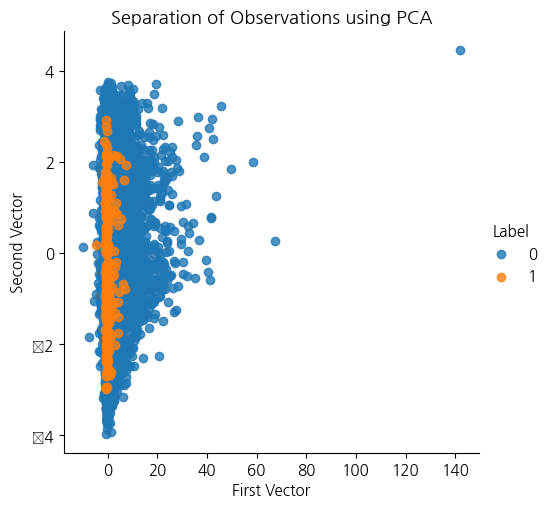

In [29]:
# 30개 주성분
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2024

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

- 평균 정밀도가 0.17로 솔루션으로 사용 부적합

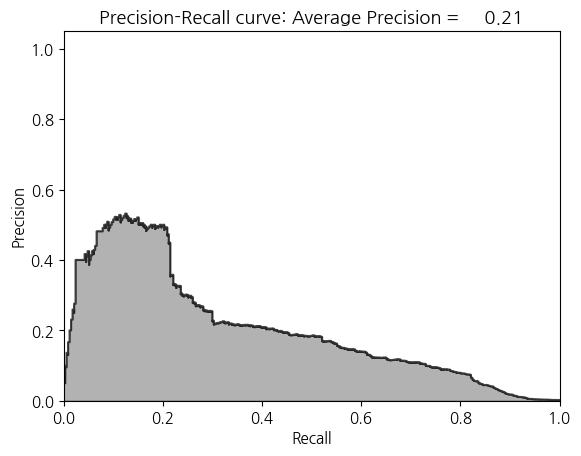

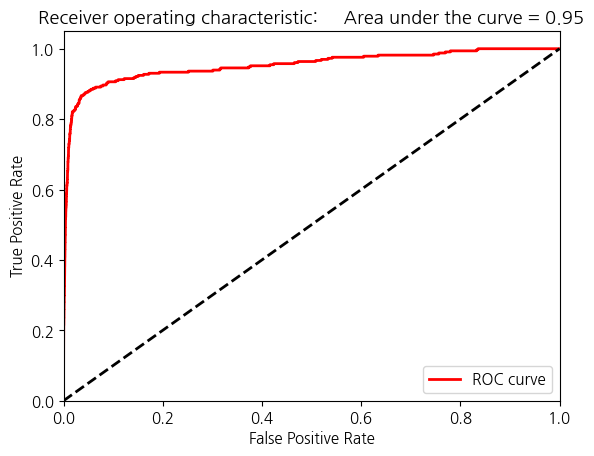

In [30]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

## 최적의 주성분 개수 찾기
- 주성분 27개가 최적의 수

최적의 주성분 개수: 27


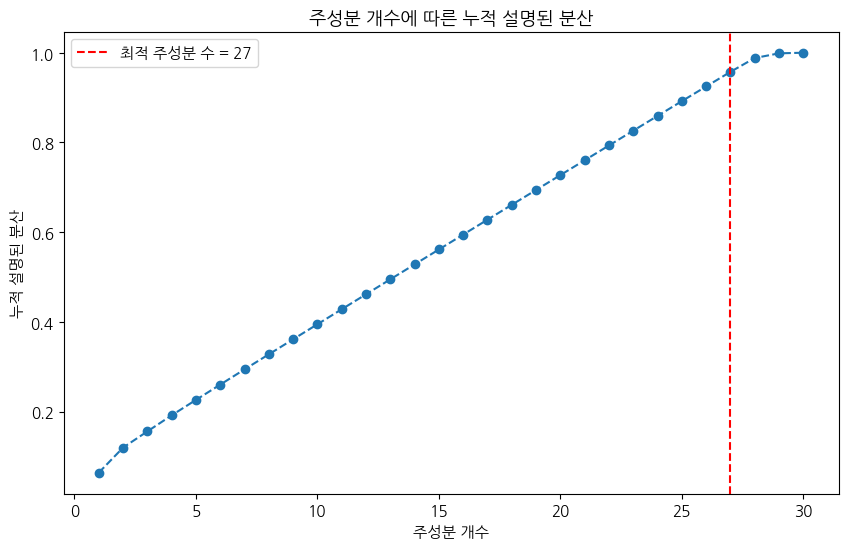

In [31]:
pca = PCA()
pca = pca.fit(X_train)

# 설명된 분산 비율 계산
explained_variance = pca.explained_variance_ratio_

# 누적 설명된 분산 계산
cumulative_explained_variance = np.cumsum(explained_variance)

# 95% 이상의 분산을 설명하는 주성분 개수 찾기
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"최적의 주성분 개수: {optimal_components}")

# 누적 설명된 분산 시각화
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(optimal_components, color='r', linestyle='--', label=f'최적 주성분 수 = {optimal_components}')
plt.title('주성분 개수에 따른 누적 설명된 분산')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명된 분산')
plt.legend()
plt.show()

c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


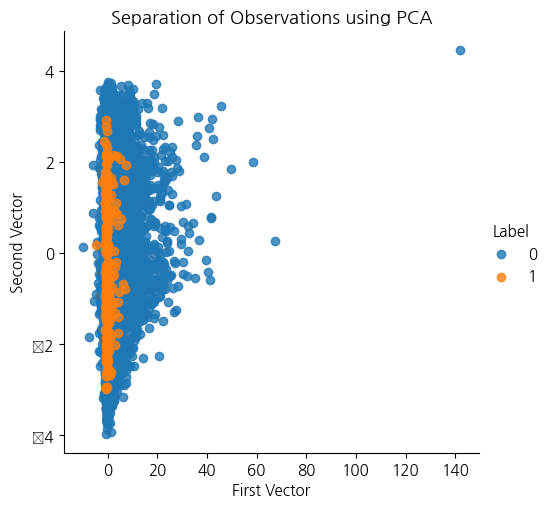

In [32]:
# 27개 주성분
from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 2024

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

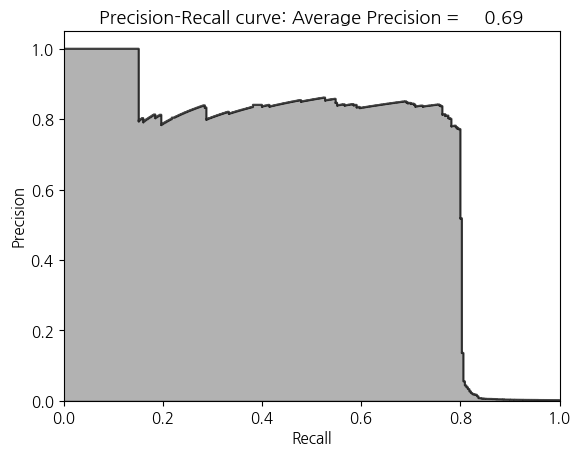

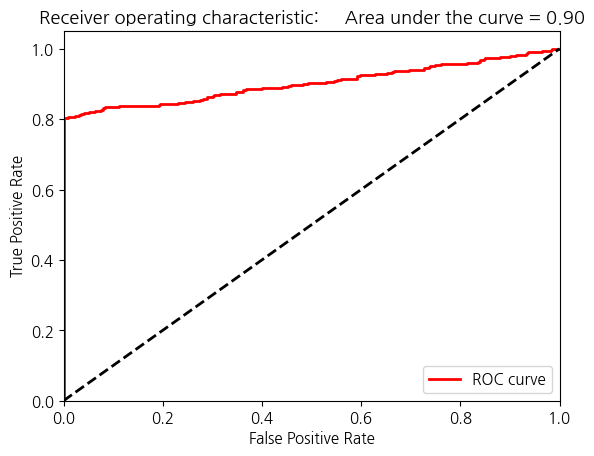

In [33]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

## GRP를 활용한 이상치 탐지

c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


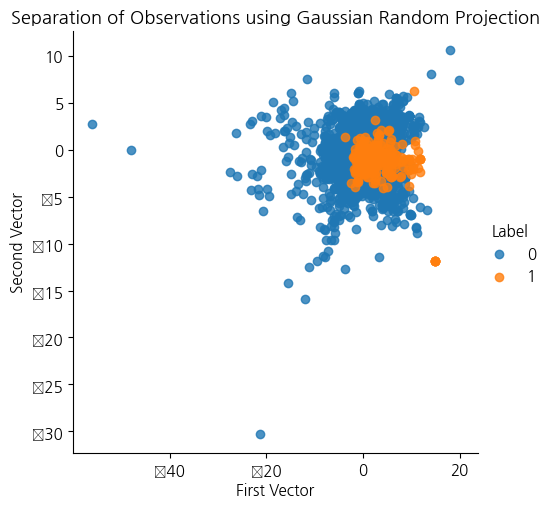

In [34]:
# 가우시안 랜덤 투영
from sklearn.random_projection import GaussianRandomProjection

n_components = 27
eps = 0.1
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, \
                               eps=eps, random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=X_train.index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

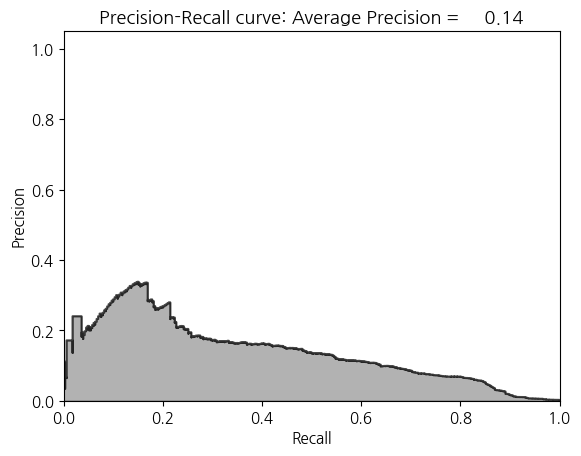

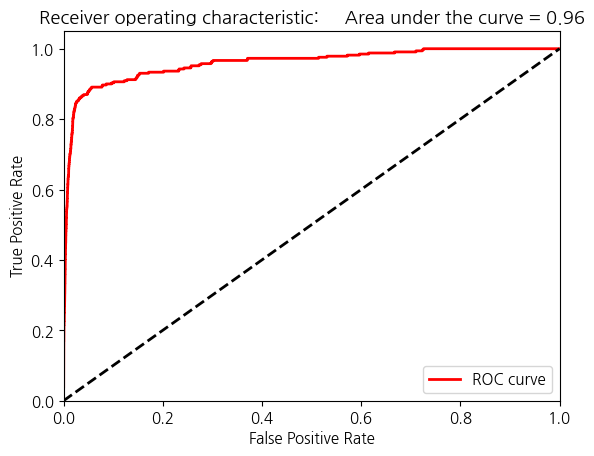

In [35]:
X_train_GRP_inverse = np.array(X_train_GRP).dot(GRP.components_)
X_train_GRP_inverse = pd.DataFrame(data=X_train_GRP_inverse, \
                                   index=X_train.index)

anomalyScoresGRP = anomalyScores(X_train, X_train_GRP_inverse)
preds = plotResults(y_train, anomalyScoresGRP, True)

## SRP를 활용한 이상치 탐지

c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


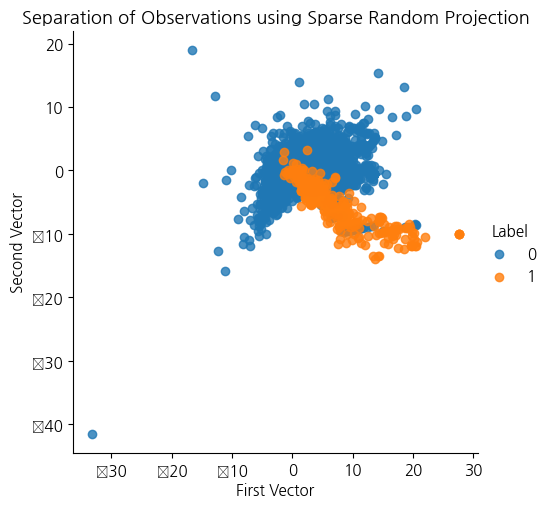

In [36]:
from sklearn.random_projection import SparseRandomProjection

n_components = 27
density = 'auto'
eps = .01
dense_output = True
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
                                random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=X_train.index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

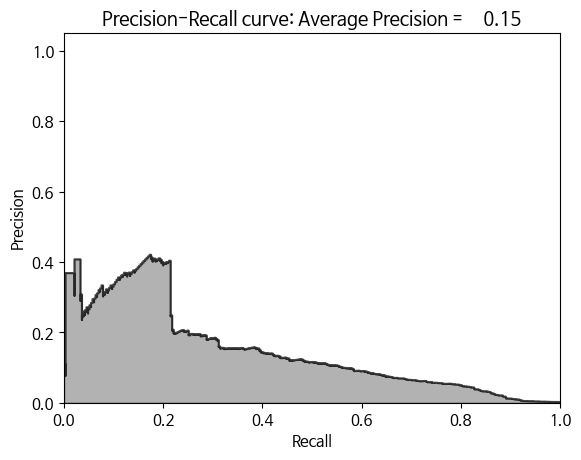

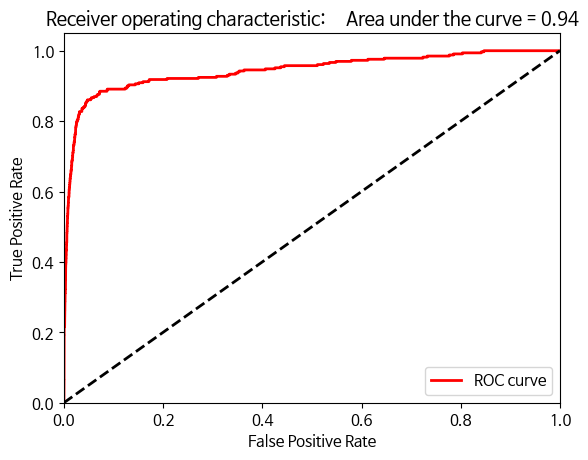

In [ ]:
X_train_SRP_inverse = np.array(X_train_SRP).dot(SRP.components_.todense())
X_train_SRP_inverse = pd.DataFrame(data=X_train_SRP_inverse, index=X_train.index)

anomalyScoresSRP = anomalyScores(X_train, X_train_SRP_inverse)
plotResults(y_train, anomalyScoresSRP)

## ICA를 활용한 이상치 탐지

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


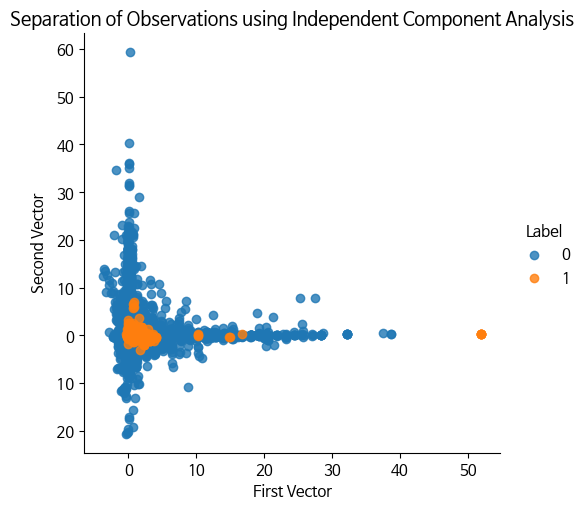

In [ ]:
from sklearn.decomposition import FastICA

n_components = 27
algorithm = 'parallel'
whiten = 'unit-variance'
max_iter = 200
random_state = 2018

fastICA = FastICA(n_components=n_components, \
    algorithm=algorithm, whiten=whiten, max_iter=max_iter, \
    random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=X_train.index)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse, \
                                       index=X_train.index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

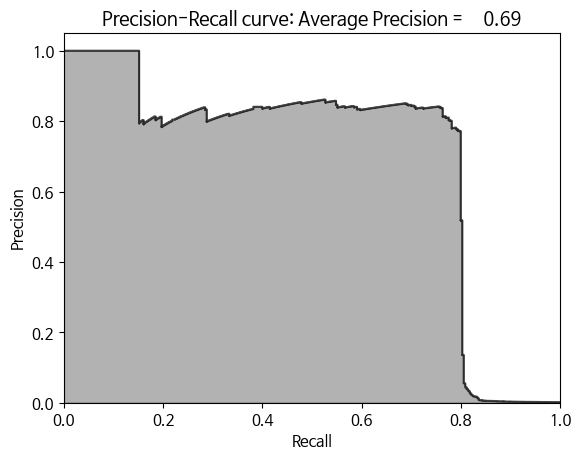

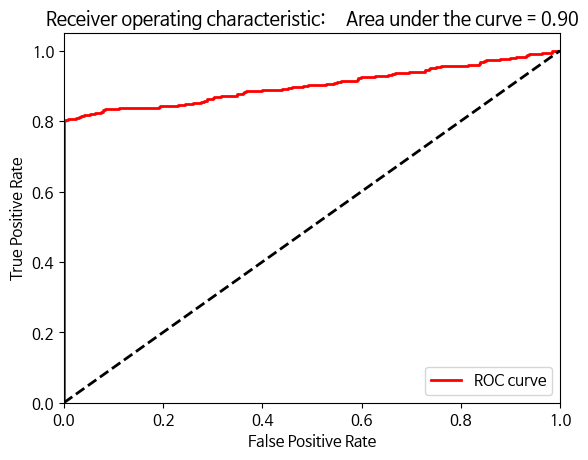

In [ ]:
anomalyScoresFastICA = anomalyScores(X_train, X_train_fastICA_inverse)
plotResults(y_train, anomalyScoresFastICA)

# 테스트셋에 두 모델 적용

## 최적의 PCA 모델

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


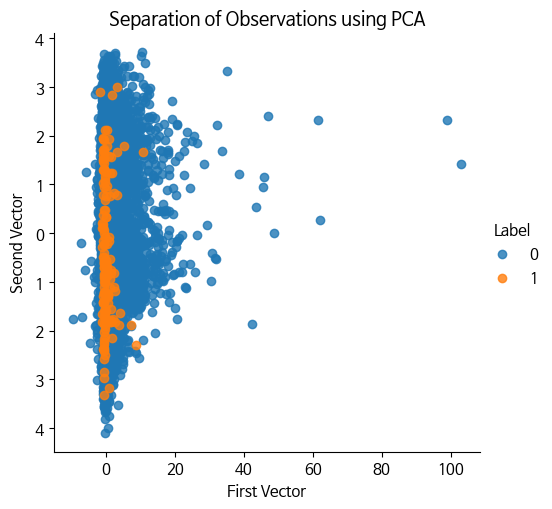

In [ ]:
# 테스트 셋에 PCA 적용
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)

scatterPlot(X_test_PCA, y_test, "PCA")

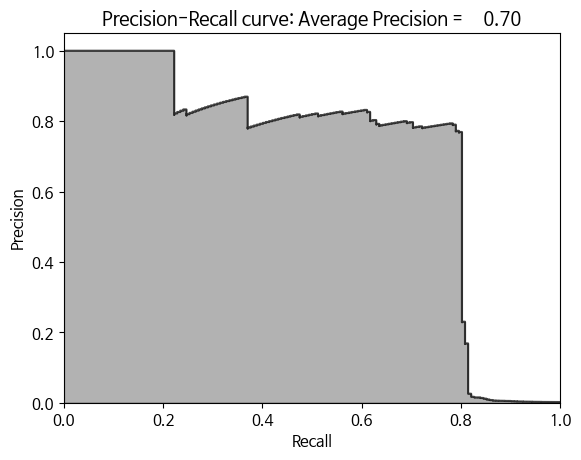

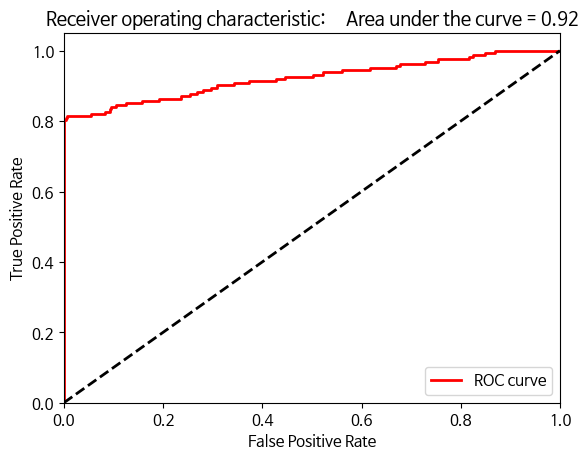

In [ ]:
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

## ICA 모델

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


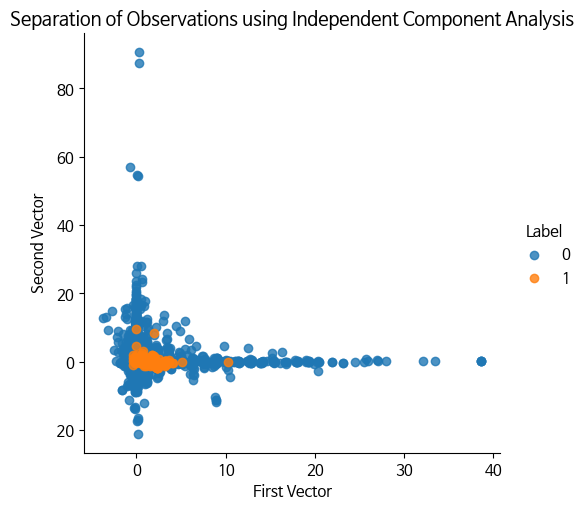

In [ ]:
X_test_fastICA = fastICA.transform(X_test)
X_test_fastICA = pd.DataFrame(data=X_test_fastICA, index=X_test.index)

X_test_fastICA_inverse = fastICA.inverse_transform(X_test_fastICA)
X_test_fastICA_inverse = pd.DataFrame(data=X_test_fastICA_inverse, \
                                      index=X_test.index)

scatterPlot(X_test_fastICA, y_test, "Independent Component Analysis")

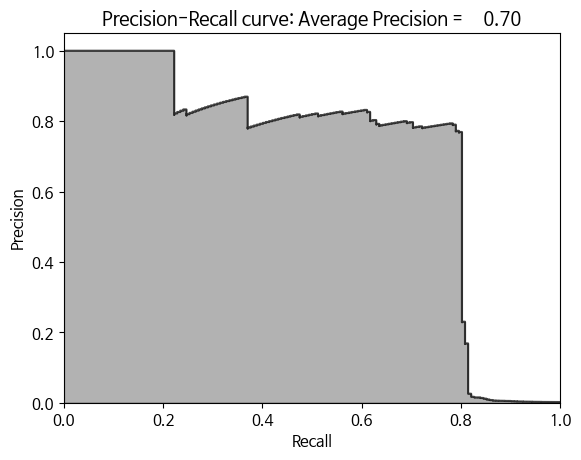

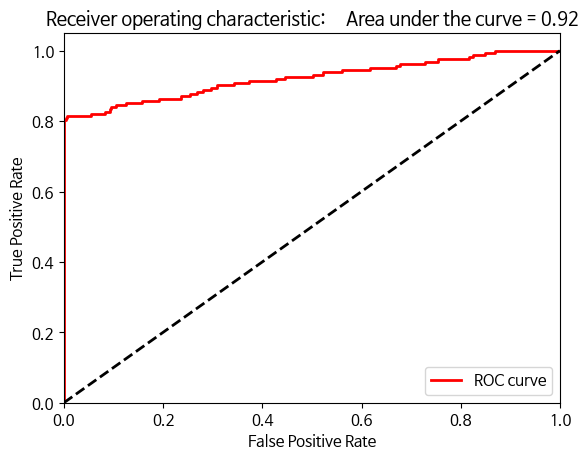

In [ ]:
anomalyScoresFastICA = anomalyScores(X_test, X_test_fastICA_inverse)
plotResults(y_test, anomalyScoresFastICA)

# 비지도학습 클래스 구현

## 데이터 준비

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)

## 클래스 구현

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc

class FraudDetection:
    def __init__(self, model):
        self.model = model
        self.scaler = StandardScaler()

    # 최적의 주성분 찾기 (PCA를 사용하여 설명된 분산이 95% 이상이 되는 주성분 개수)
    def find_optimal_components(self, data):
        pca = PCA()
        pca.fit(self.scaler.fit_transform(data))
        explained_variance = np.cumsum(pca.explained_variance_ratio_)
        optimal_components = np.argmax(explained_variance >= 0.95) + 1
        return optimal_components

    # 이상치 점수 계산 (재구성 오차 기반)
    def anomalyScores(self, originalDF, reducedDF):
        loss = np.sum((np.array(originalDF) - np.array(reducedDF)) ** 2, axis=1)
        loss = pd.Series(data=loss, index=originalDF.index)
        loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
        return loss

    # 모델 학습 및 평가
    def train_and_evaluate(self, X, y):
        # 데이터 스케일링
        X_scaled = self.scaler.fit_transform(X)

        # 모델 적용
        self.model.fit(X_scaled)
        X_reduced = self.model.transform(X_scaled)

        # 재구성된 데이터 생성
        X_inverse = self.model.inverse_transform(X_reduced)

        # 이상치 점수 계산
        anomaly_scores = self.anomalyScores(pd.DataFrame(X_scaled), pd.DataFrame(X_inverse))

        # 인덱스를 리셋하여 KeyError 방지
        y_clean = y.reset_index(drop=True)
        anomaly_scores_clean = anomaly_scores.reset_index(drop=True)

        # 결과 평가 (returnPreds=True로 설정하여 결과 반환)
        preds = self.plot_combined_graphs(y_clean, anomaly_scores_clean, returnPreds=True)
        return preds

    # Precision-Recall, ROC 곡선 및 Anomaly Score 분포를 1x3 레이아웃으로 시각화
    def plot_combined_graphs(self, trueLabels, anomalyScores, returnPreds=False):
        # NaN 제거
        preds = pd.concat([trueLabels, anomalyScores], axis=1).dropna()
        preds.columns = ['trueLabel', 'anomalyScore']

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(preds['trueLabel'], preds['anomalyScore'])
        average_precision = average_precision_score(preds['trueLabel'], preds['anomalyScore'])

        # ROC Curve
        fpr, tpr, _ = roc_curve(preds['trueLabel'], preds['anomalyScore'])
        areaUnderROC = auc(fpr, tpr)

        # 1x3 형태의 그래프 만들기
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # 첫 번째 그래프: Precision-Recall Curve
        axes[0].step(recall, precision, color='k', alpha=0.7, where='post')
        axes[0].fill_between(recall, precision, step='post', alpha=0.3, color='k')
        axes[0].set_xlabel('Recall')
        axes[0].set_ylabel('Precision')
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_title(f'Precision-Recall: AP = {average_precision:0.2f}')

        # 두 번째 그래프: ROC Curve
        axes[1].plot(fpr, tpr, color='r', lw=2, label=f'ROC curve (area = {areaUnderROC:0.2f})')
        axes[1].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')

        plt.tight_layout()
        plt.show()

        if returnPreds:
            return preds

    # Scatter plot 시각화 (t-SNE, PCA 등)
    def scatterPlot(self, xDF, yDF, algoName):
        tempDF = pd.DataFrame(data=xDF.loc[:, 0:1], index=xDF.index)
        tempDF = pd.concat((tempDF, yDF), axis=1, join="inner")
        tempDF.columns = ["First Vector", "Second Vector", "Label"]
        sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False)
        ax = plt.gca()
        ax.set_title(f"Separation of Observations using {algoName}")

    # 예측 결과를 엑셀로 내보내기 (pandas 내장 기능 사용)
    def export_results_to_excel(self, preds, filename="predictions.xlsx"):
        preds.to_excel(filename, sheet_name='Predictions', index=False)
        print(f"Predictions exported to {filename}")




## ICA 모델 테스트

Testing FastICA...


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


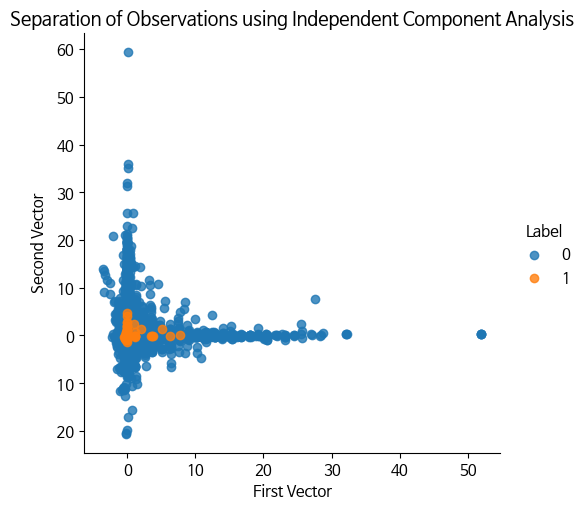

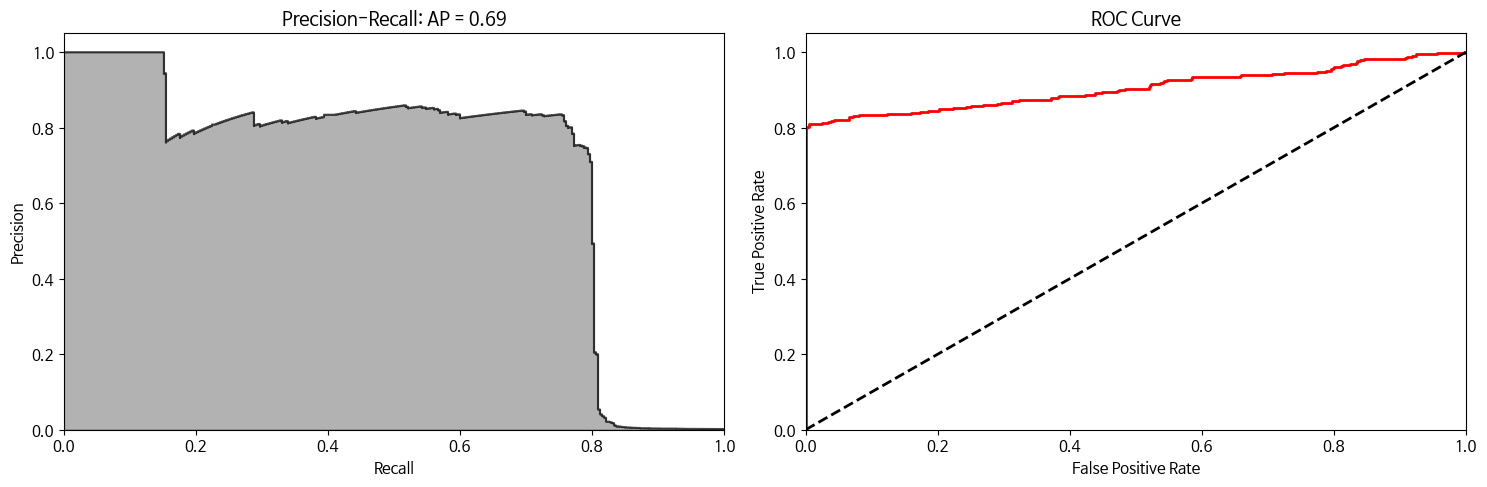

Predictions exported to fraud_detection_results_fastICA.xlsx


In [ ]:
# FastICA 설정
n_components = 27
fastICA_model = FastICA(n_components=n_components, algorithm='parallel', whiten='unit-variance', max_iter=200, random_state=2018)

# FastICA 적용 및 평가
print("Testing FastICA...")
fraud_detector_fastICA = FraudDetection(fastICA_model)
X_train_fastICA = fastICA_model.fit_transform(X_train)
fraud_detector_fastICA.scatterPlot(pd.DataFrame(X_train_fastICA), y_train, "Independent Component Analysis")
preds_fastICA = fraud_detector_fastICA.train_and_evaluate(X_train, y_train)
fraud_detector_fastICA.export_results_to_excel(preds_fastICA, "fraud_detection_results_fastICA.xlsx")

## PCA 모델 테스트

Testing PCA...


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


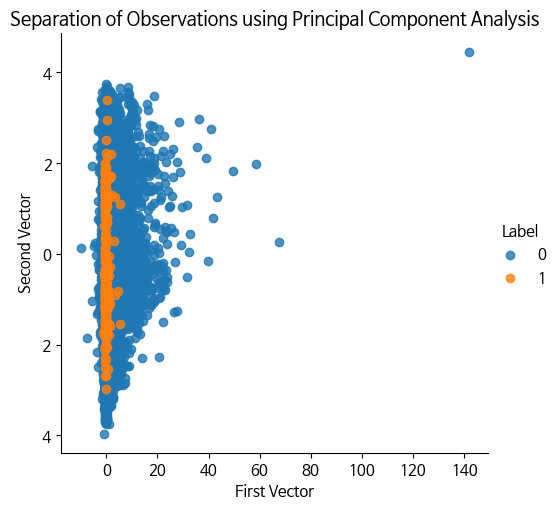

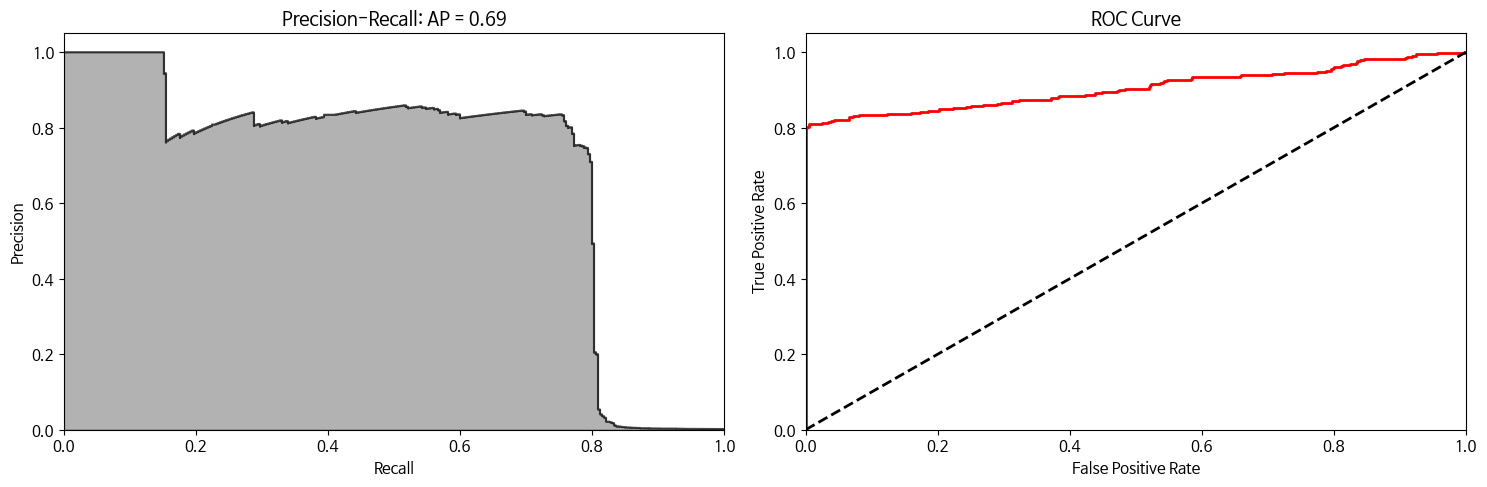

Predictions exported to fraud_detection_results_PCA.xlsx


In [ ]:
# PCA 설정
pca_model = PCA(n_components=n_components)

# PCA 적용 및 평가
print("Testing PCA...")
fraud_detector_pca = FraudDetection(pca_model)
X_train_pca = pca_model.fit_transform(X_train)
fraud_detector_pca.scatterPlot(pd.DataFrame(X_train_pca), y_train, "Principal Component Analysis")
preds_pca = fraud_detector_pca.train_and_evaluate(X_train, y_train)
fraud_detector_pca.export_results_to_excel(preds_pca, "fraud_detection_results_PCA.xlsx")

# 비지도학습 클래스 구현2
- 최적의 주성분 찾기 기능 포함

## 가상의 데이터 만들기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.datasets import make_classification

In [ ]:
# 가상 데이터 생성 (신용카드 거래와 유사한 데이터셋)
def generate_fake_credit_data(n_samples=10000, n_features=30):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=28, n_redundant=2,
                               n_classes=2, weights=[0.99, 0.01], random_state=42)
    feature_names = [f'V{i}' for i in range(1, n_features + 1)]
    df = pd.DataFrame(X, columns=feature_names)
    df['Class'] = y
    return df

# 데이터 생성
df = generate_fake_credit_data()
X = df.drop(columns=['Class'])
y = df['Class']

## 클래스 구현

In [ ]:
class FraudDetection:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()

    # 최적의 주성분 찾기 (PCA를 사용하여 설명된 분산이 95% 이상이 되는 주성분 개수)
    def find_optimal_components(self, X):
        pca = PCA()
        scaled_X = self.scaler.fit_transform(X)
        pca.fit(scaled_X)
        explained_variance = np.cumsum(pca.explained_variance_ratio_)
        optimal_components = np.argmax(explained_variance >= 0.95) + 1
        print(f"Optimal number of components: {optimal_components}")  # 최적의 주성분 개수 출력
        return optimal_components

    # PCA 적용 (최적 주성분 수 반영)
    def apply_pca(self, X):
        # 최적의 주성분 개수 찾기
        n_components = self.find_optimal_components(X)

        # 최적 주성분 개수를 바탕으로 PCA 모델 설정
        self.model = PCA(n_components=n_components)

        # 스케일링 후 모델 적용
        X_scaled = self.scaler.fit_transform(X)
        X_reduced = self.model.fit_transform(X_scaled)
        return X_reduced

    # 이상치 점수 계산 (재구성 오차 기반)
    def anomalyScores(self, originalDF, reducedDF):
        loss = np.sum((np.array(originalDF) - np.array(reducedDF)) ** 2, axis=1)
        loss = pd.Series(data=loss, index=originalDF.index)
        loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
        return loss

    # 모델 학습 및 평가
    def train_and_evaluate(self, X, y):
        # PCA 적용 및 데이터 변환
        X_reduced = self.apply_pca(X)

        # 재구성된 데이터 생성 (PCA의 경우)
        X_inverse = self.model.inverse_transform(X_reduced)

        # 이상치 점수 계산
        anomaly_scores = self.anomalyScores(pd.DataFrame(X), pd.DataFrame(X_inverse))

        # 인덱스를 리셋하여 KeyError 방지
        y_clean = y.reset_index(drop=True)
        anomaly_scores_clean = anomaly_scores.reset_index(drop=True)

        # 결과 평가 (returnPreds=True로 설정하여 결과 반환)
        preds = self.plot_combined_graphs(X_reduced, y_clean, anomaly_scores_clean, returnPreds=True)
        return preds

    # Precision-Recall, ROC 곡선 및 Anomaly Score 분포를 1x3 레이아웃으로 시각화
    def plot_combined_graphs(self, X_reduced, trueLabels, anomalyScores, returnPreds=False):
        # NaN 제거
        preds = pd.concat([trueLabels, anomalyScores], axis=1).dropna()
        preds.columns = ['trueLabel', 'anomalyScore']

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(preds['trueLabel'], preds['anomalyScore'])
        average_precision = average_precision_score(preds['trueLabel'], preds['anomalyScore'])

        # ROC Curve
        fpr, tpr, _ = roc_curve(preds['trueLabel'], preds['anomalyScore'])
        areaUnderROC = auc(fpr, tpr)

        # 1x3 형태의 그래프 만들기
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))

        # 첫 번째 그래프: Precision-Recall Curve
        axes[0].step(recall, precision, color='k', alpha=0.7, where='post')
        axes[0].fill_between(recall, precision, step='post', alpha=0.3, color='k')
        axes[0].set_xlabel('Recall')
        axes[0].set_ylabel('Precision')
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_title(f'Precision-Recall: AP = {average_precision:0.2f}')

        # 두 번째 그래프: ROC Curve
        axes[1].plot(fpr, tpr, color='r', lw=2, label=f'ROC curve (area = {areaUnderROC:0.2f})')
        axes[1].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')

        # 세 번째 그래프: 산점도 (Scatter Plot)
        tempDF = pd.DataFrame(data=X_reduced[:, 0:2], columns=["First Vector", "Second Vector"], index=trueLabels.index)
        tempDF = pd.concat([tempDF, trueLabels], axis=1)
        tempDF.columns = ["First Vector", "Second Vector", "Label"]
        # print(tempDF.head())
        # 세 번째 그래프: 산점도 (Scatter Plot) - Label 1은 빨간색, alpha 1.0
        palette = {0: 'blue', 1: 'red'}
        # 세 번째 그래프: 산점도 (Scatter Plot) - Label 1은 빨간색(alpha=1.0), Label 0은 파란색(alpha=0.5)
        sns.scatterplot(x=X_reduced[trueLabels == 0, 0], y=X_reduced[trueLabels == 0, 1], color='blue', alpha=0.3, ax=axes[2], label='Label 0')
        sns.scatterplot(x=X_reduced[trueLabels == 1, 0], y=X_reduced[trueLabels == 1, 1], color='red', alpha=1.0, ax=axes[2], label='Label 1')
        axes[2].set_title('Separation of Observations using PCA')
        axes[2].set_xlabel('Component 1')
        axes[2].set_ylabel('Component 2')

        plt.tight_layout()
        plt.show()

        if returnPreds:
            return preds

    # 예측 결과를 엑셀로 내보내기 (pandas 내장 기능 사용)
    def export_results_to_excel(self, preds, filename="predictions.xlsx"):
        preds.to_excel(filename, sheet_name='Predictions', index=False)
        print(f"Predictions exported to {filename}")

## 실제 데이터 테스트

Optimal number of components: 27


<ipython-input-73-3826583bf965>:104: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


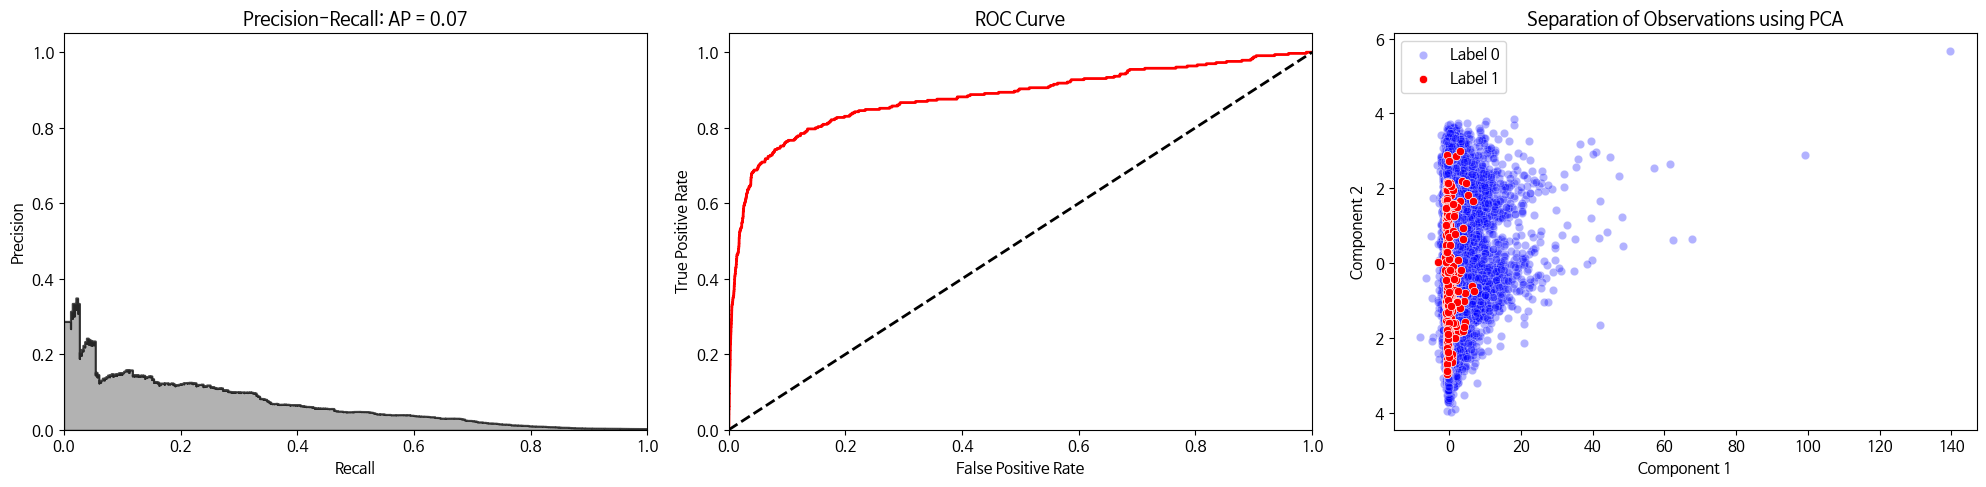

Predictions exported to pca_results.xlsx


In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2024, stratify=dataY)
fraud_detector_pca = FraudDetection()
preds_pca = fraud_detector_pca.train_and_evaluate(X_train, y_train)
fraud_detector_pca.export_results_to_excel(preds_pca, "pca_results.xlsx")

# 비지도 클래스 구현3

## 클래스

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.decomposition import KernelPCA

class FraudDetection:
    def __init__(self, model=None):
        self.model = model
        self.scaler = StandardScaler()

    # 최적의 주성분 또는 컴포넌트를 찾는 함수 (PCA, ICA, KernelPCA, SparsePCA 등 다양한 모델 지원)
    def find_optimal_components(self, X):
        if isinstance(self.model, PCA):
            pca = PCA()
            scaled_X = self.scaler.fit_transform(X)
            pca.fit(scaled_X)
            explained_variance = np.cumsum(pca.explained_variance_ratio_)
            optimal_components = np.argmax(explained_variance >= 0.95) + 1
            print(f"Optimal number of components: {optimal_components}")  # 최적의 주성분 개수 출력
            return optimal_components
        else:
            # PCA가 아닌 모델은 사용자가 모델을 지정해 주는 대로 컴포넌트를 설정
            return self.model.n_components

    # PCA, ICA, KernelPCA, SparsePCA 등 다양한 차원 축소 모델에 적용
    def apply_dimensionality_reduction(self, X):
        # 최적의 주성분 개수 찾기 또는 고정된 주성분 사용
        if isinstance(self.model, PCA):
            n_components = 27  # n_components=27 강제 설정
        else:
            n_components = self.find_optimal_components(X)

        # 최적 컴포넌트를 사용하여 모델 설정
        if isinstance(self.model, PCA) or isinstance(self.model, FastICA) or isinstance(self.model, SparsePCA):
            self.model.set_params(n_components=n_components)

        # 스케일링 후 모델 적용
        X_scaled = self.scaler.fit_transform(X)
        X_reduced = self.model.fit_transform(X_scaled)
        return X_reduced

    # 이상치 점수 계산 (재구성 오차 기반)
    def anomalyScores(self, originalDF, reducedDF):
        loss = np.sum((np.array(originalDF) - np.array(reducedDF)) ** 2, axis=1)
        loss = pd.Series(data=loss, index=originalDF.index)
        loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
        return loss

    # 모델 학습 및 평가
    def train_and_evaluate(self, X, y):
        # PCA, ICA 등 차원 축소 적용 및 데이터 변환
        X_reduced = self.apply_dimensionality_reduction(X)

        # 재구성된 데이터 생성 (재구성 가능한 모델일 경우, PCA 같은 경우에만)
        if hasattr(self.model, 'inverse_transform'):
            X_inverse = self.model.inverse_transform(X_reduced)
            anomaly_scores = self.anomalyScores(pd.DataFrame(X), pd.DataFrame(X_inverse))
        else:
            anomaly_scores = pd.Series(np.zeros(len(X)), index=X.index)  # 재구성이 불가능한 모델인 경우

        # 인덱스를 리셋하여 KeyError 방지
        y_clean = y.reset_index(drop=True)
        anomaly_scores_clean = anomaly_scores.reset_index(drop=True)

        # 결과 평가 (returnPreds=True로 설정하여 결과 반환)
        preds = self.plot_combined_graphs(X_reduced, y_clean, anomaly_scores_clean, returnPreds=True)

        # 추가: 성능 평가 로그 출력
        predicted_labels = (anomaly_scores_clean > 0.5).astype(int)
        precision = precision_score(y_clean, predicted_labels)
        recall = recall_score(y_clean, predicted_labels)
        f1 = f1_score(y_clean, predicted_labels)
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        return preds

    def evaluate_test_data(self, X_test, y_test, filename="test_results.xlsx"):
        """
        테스트 데이터셋을 평가하고 예측 결과를 엑셀 파일로 내보냅니다.
        예측 결과는 정상일 확률, 사기일 확률, 사기 거래 판정으로 구성됩니다.
        """
        # 테스트 데이터에 차원 축소 적용
        X_test_reduced = self.model.transform(self.scaler.transform(X_test))

        # 차원 축소 후 원래 인덱스를 보존한 DataFrame으로 변환
        X_test_reduced_df = pd.DataFrame(X_test_reduced, index=X_test.index)

        # 재구성된 데이터 생성 (가능한 경우)
        if hasattr(self.model, 'inverse_transform'):
            X_test_inverse = self.model.inverse_transform(X_test_reduced)
            anomaly_scores = self.anomalyScores(pd.DataFrame(X_test, index=X_test.index), pd.DataFrame(X_test_inverse, index=X_test.index))
        else:
            anomaly_scores = pd.Series(np.zeros(len(X_test)), index=X_test.index)  # 재구성이 불가능한 모델

        # 확률 계산: 정상 샘플일 확률과 이상치일 확률을 추가
        normal_probs = 1 - anomaly_scores
        anomaly_probs = anomaly_scores

        # 사기 거래 판정 (기준: Anomaly_Prob > 0.5)
        fraud_predictions = (anomaly_probs > 0.5).astype(int)

        # 거래 판정: 0이면 '거래정상', 1이면 '거래사기 => 거래 번호 확인'
        transaction_status = fraud_predictions.apply(lambda x: '거래정상' if x == 0 else '거래사기 => 거래 번호 확인')

        # 결과 데이터 프레임 구성
        results_df = pd.DataFrame({
            'Index': X_test.index,  # 원래 인덱스 유지
            'Normal_Prob': normal_probs,
            'Anomaly_Prob': anomaly_probs,
            'Fraud_Prediction': fraud_predictions,
            'Transaction_Status': transaction_status
        }).set_index('Index')  # 원래 인덱스를 유지

        # 결과를 엑셀로 내보내기
        results_df.to_excel(filename, sheet_name='Predictions')
        print(f"Predictions exported to {filename}")

        return results_df


    # Precision-Recall, ROC 곡선 및 Anomaly Score 분포를 1x3 레이아웃으로 시각화 (모델 클래스 이름 포함)
    def plot_combined_graphs(self, X_reduced, trueLabels, anomalyScores, returnPreds=False):
        # NaN 제거
        preds = pd.concat([trueLabels, anomalyScores], axis=1).dropna()
        preds.columns = ['trueLabel', 'anomalyScore']

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(preds['trueLabel'], preds['anomalyScore'])
        average_precision = average_precision_score(preds['trueLabel'], preds['anomalyScore'])

        # ROC Curve
        fpr, tpr, _ = roc_curve(preds['trueLabel'], preds['anomalyScore'])
        areaUnderROC = auc(fpr, tpr)

        # 1x3 형태의 그래프 만들기
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))

        # 모델 클래스 이름을 타이틀로 추가
        model_name = self.model.__class__.__name__
        fig.suptitle(f'Model: {model_name}', fontsize=16)

        # 첫 번째 그래프: Precision-Recall Curve
        axes[0].step(recall, precision, color='k', alpha=0.7, where='post')
        axes[0].fill_between(recall, precision, step='post', alpha=0.3, color='k')
        axes[0].set_xlabel('Recall')
        axes[0].set_ylabel('Precision')
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_title(f'Precision-Recall: AP = {average_precision:0.2f}')

        # 두 번째 그래프: ROC Curve
        axes[1].plot(fpr, tpr, color='r', lw=2, label=f'ROC curve (area = {areaUnderROC:0.2f})')
        axes[1].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')

        # 세 번째 그래프: 산점도 (Scatter Plot)
        sns.scatterplot(x=X_reduced[trueLabels == 0, 0], y=X_reduced[trueLabels == 0, 1], color='blue', alpha=0.3, ax=axes[2], label='Label 0')
        sns.scatterplot(x=X_reduced[trueLabels == 1, 0], y=X_reduced[trueLabels == 1, 1], color='red', alpha=1.0, ax=axes[2], label='Label 1')
        axes[2].set_title('Separation of Observations using Dimensionality Reduction')
        axes[2].set_xlabel('Component 1')
        axes[2].set_ylabel('Component 2')

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # 타이틀 공간 확보
        plt.show()

        if returnPreds:
            return preds

    # 예측 결과를 엑셀로 내보내기 (pandas 내장 기능 사용)
    def export_results_to_excel(self, preds, filename="predictions.xlsx"):
        preds.to_excel(filename, sheet_name='Predictions', index=False)
        print(f"Predictions exported to {filename}")

## 가상의 데이터 테스트

Testing PCA...


<ipython-input-75-ee984a3c5876>:172: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # 타이틀 공간 확보
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


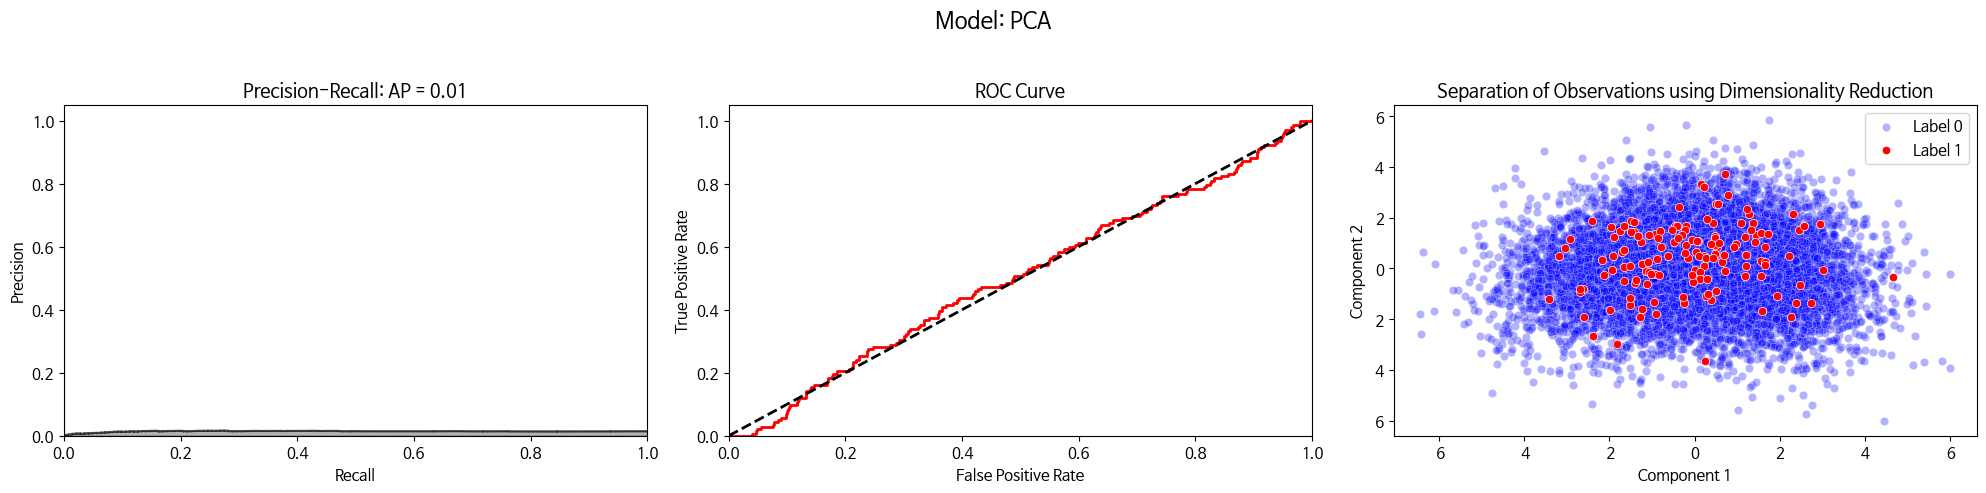

Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Predictions exported to test_results_PCA.xlsx
Testing FastICA...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
<ipython-input-75-ee984a3c5876>:172: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # 타이틀 공간 확보
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


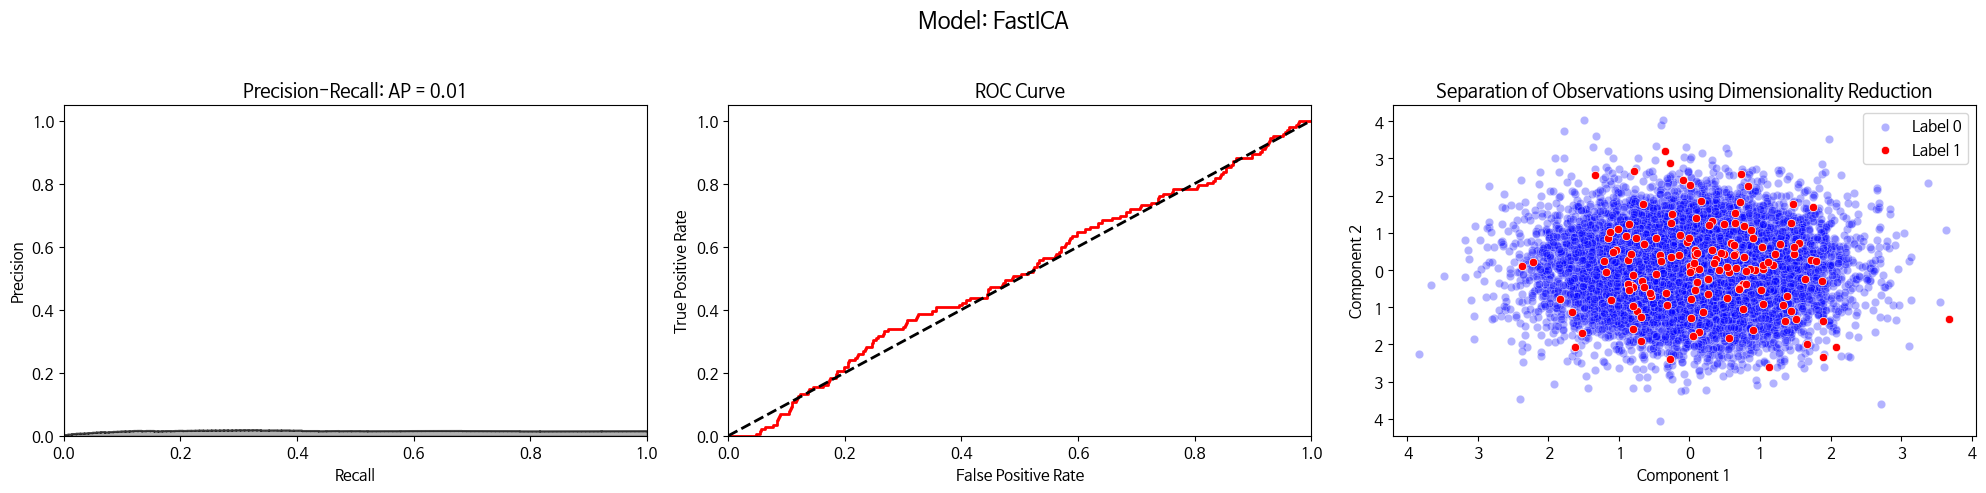

Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Predictions exported to test_results_PCA.xlsx


In [ ]:
# 가상 데이터 생성 (신용카드 거래와 유사한 데이터셋)
def generate_fake_credit_data(n_samples=10000, n_features=30):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=28, n_redundant=2,
                               n_classes=2, weights=[0.99, 0.01], random_state=42)
    feature_names = [f'V{i}' for i in range(1, n_features + 1)]
    df = pd.DataFrame(X, columns=feature_names)
    df['Class'] = y
    return df

# 데이터 생성
df = generate_fake_credit_data()
X = df.drop(columns=['Class'])
y = df['Class']

# 테스트 데이터 생성 (여기서는 샘플로 생성하지만, 실제로는 별도의 테스트 데이터를 입력)
df_test = generate_fake_credit_data(n_samples=2000)
X_test = df_test.drop(columns=['Class'])
y_test = df_test['Class']

# 다양한 모델 테스트
models = {
    "PCA": PCA(),
    "FastICA": FastICA()
}

# 각 모델에 대해 학습 및 평가
for model_name, model in models.items():
    print(f"Testing {model_name}...")
    fraud_detector = FraudDetection(model=model)
    preds = fraud_detector.train_and_evaluate(X, y)
    # 테스트 데이터셋에 대해 평가 및 시각화, 엑셀로 내보내기
    fraud_detector.evaluate_test_data(X_test, y_test, filename="test_results_PCA.xlsx")

## 실제 데이터 테스트

Testing PCA...


<ipython-input-75-ee984a3c5876>:172: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # 타이틀 공간 확보
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


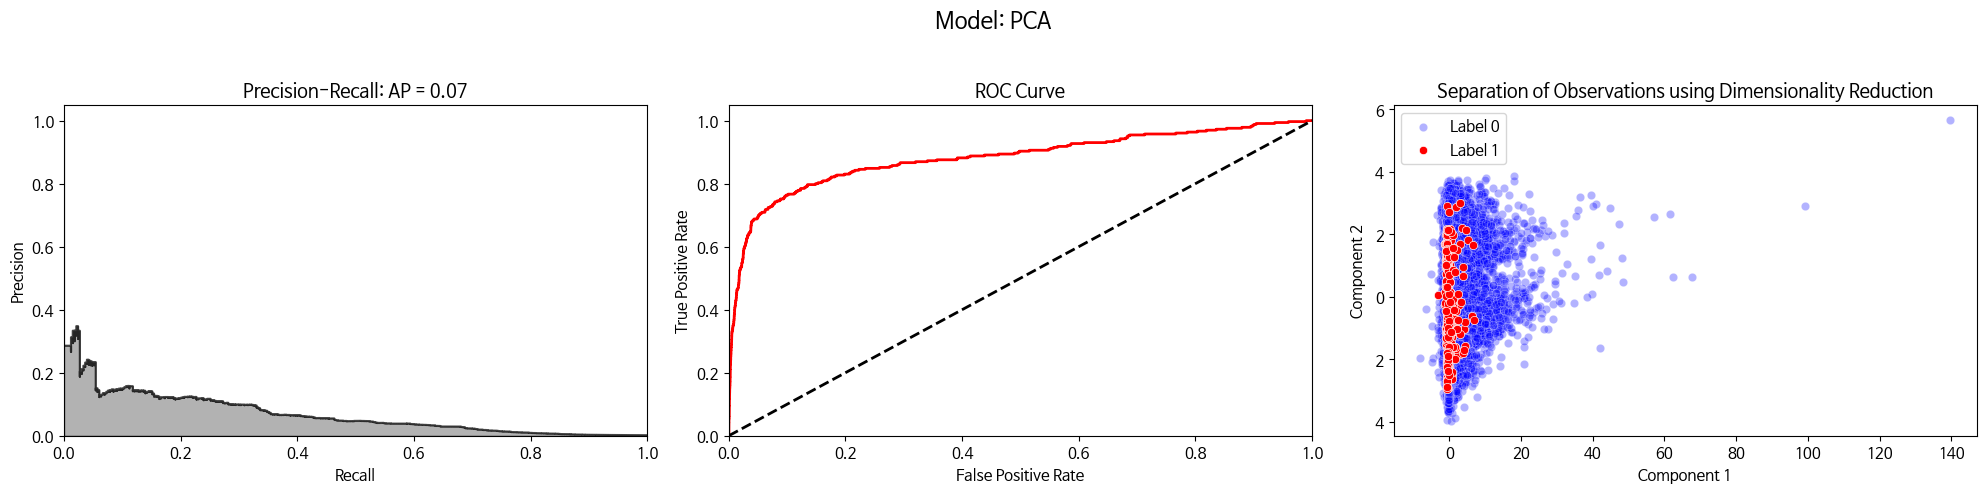

Precision: 0.2353, Recall: 0.0485, F1 Score: 0.0804
Predictions exported to test_results_PCA.xlsx
Testing FastICA...


<ipython-input-75-ee984a3c5876>:172: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # 타이틀 공간 확보
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


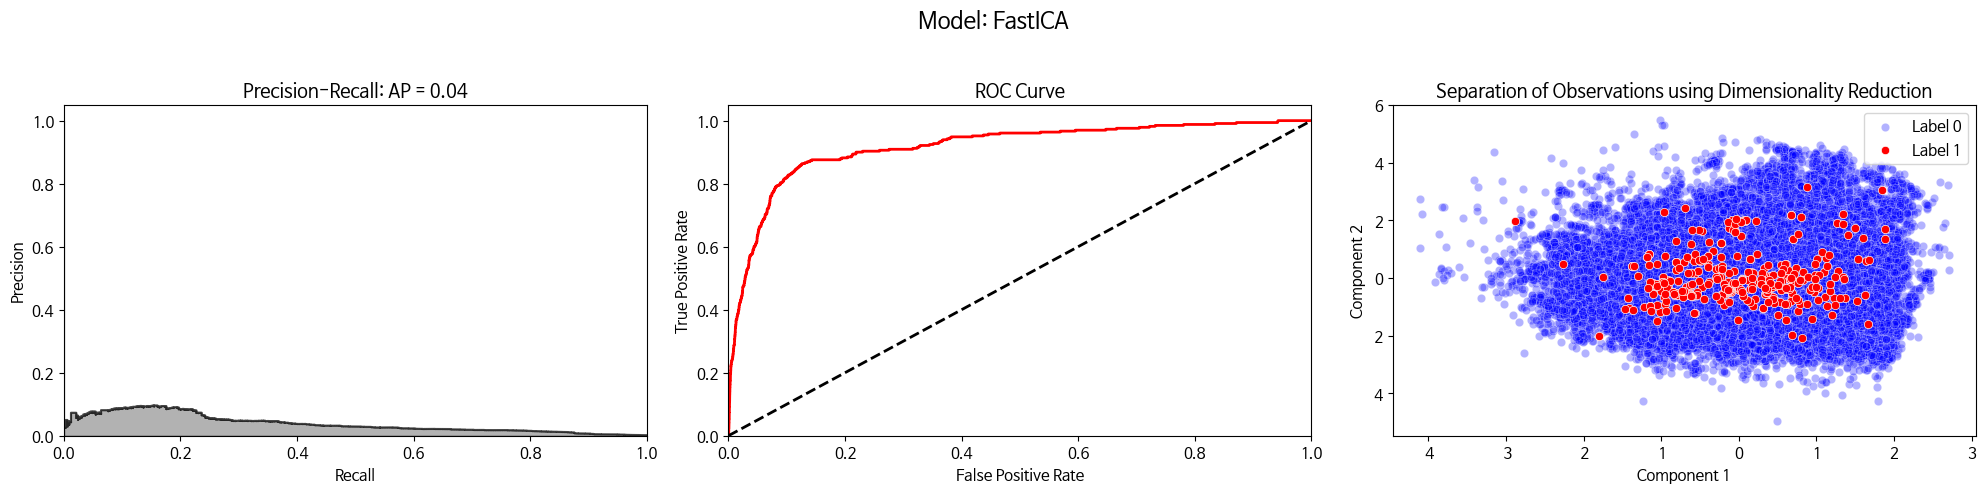

Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Predictions exported to test_results_PCA.xlsx


In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2024, stratify=dataY)

# 다양한 모델 테스트
models = {
    "PCA": PCA(),
    "FastICA": FastICA()
}

# 각 모델에 대해 학습 및 평가
for model_name, model in models.items():
    print(f"Testing {model_name}...")
    fraud_detector = FraudDetection(model=model)
    preds = fraud_detector.train_and_evaluate(X_train, y_train)
    # 테스트 데이터셋에 대해 평가 및 시각화, 엑셀로 내보내기
    fraud_detector.evaluate_test_data(X_test, y_test, filename="test_results_PCA.xlsx")